In [1]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#reading Dataset
Country_dt = pd.read_csv("Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [3]:
Country_dt.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Sanity Check
Country_dt.shape
Country_dt.describe()
Country_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
#Na Handling
Country_dt.isnull().values.any()
Country_dt.isnull().values.sum()
Country_dt.isnull().sum()*100/Country_dt.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

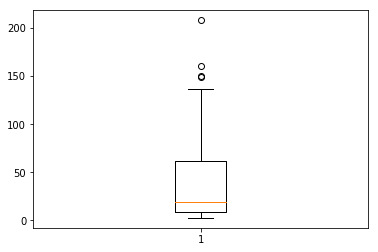

In [9]:
# outlier treatment for child_mort
plt.boxplot(Country_dt.child_mort)
Q1 = Country_dt.child_mort.quantile(0.25)
Q3 = Country_dt.child_mort.quantile(0.75)
IQR = Q3 - Q1
Country_dt = Country_dt[(Country_dt.child_mort >= Q1 - 1.5*IQR) & (Country_dt.child_mort <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x1a1aa24780>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1aa2d2e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1aa35048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1aa2dba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1aa24908>,
  <matplotlib.lines.Line2D at 0x1a1aa24e48>]}

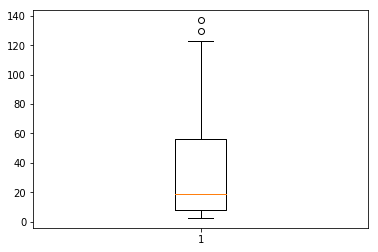

In [10]:
plt.boxplot(Country_dt.child_mort)

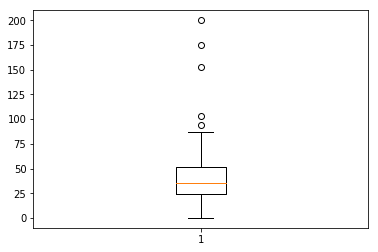

In [11]:
# outlier treatment for Amount
plt.boxplot(Country_dt.exports)
Q1 = Country_dt.exports.quantile(0.25)
Q3 = Country_dt.exports.quantile(0.75)
IQR = Q3 - Q1
Country_dt = Country_dt[(Country_dt.exports >= Q1 - 1.5*IQR) & (Country_dt.exports <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x1a1ac14d68>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1ac1d8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ac26630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ac261d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1ac14ef0>,
  <matplotlib.lines.Line2D at 0x1a1ac1d470>]}

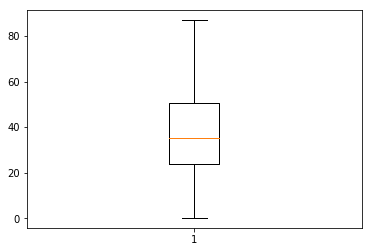

In [12]:
plt.boxplot(Country_dt.exports)

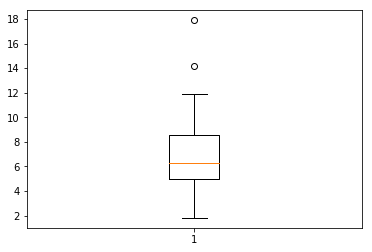

In [13]:
# outlier treatment for Amount
plt.boxplot(Country_dt.health)
Q1 = Country_dt.health.quantile(0.25)
Q3 = Country_dt.health.quantile(0.75)
IQR = Q3 - Q1
Country_dt = Country_dt[(Country_dt.health >= Q1 - 1.5*IQR) & (Country_dt.health <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x1a1ad94b38>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1ad9d6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ada7400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ad9df60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1ad94cc0>,
  <matplotlib.lines.Line2D at 0x1a1ad9d240>]}

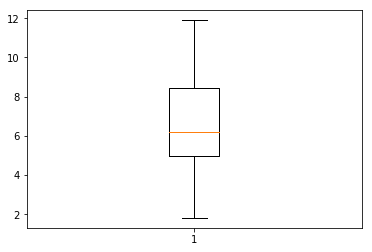

In [14]:
plt.boxplot(Country_dt.health)

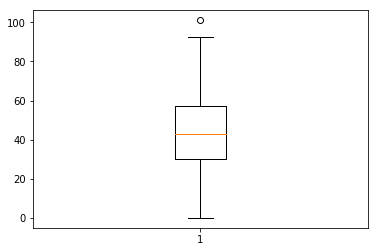

In [16]:
#imports	income	inflation	life_expec	total_fer	gdpp
# outlier treatment for Amount
plt.boxplot(Country_dt.imports)
Q1 = Country_dt.imports.quantile(0.25)
Q3 = Country_dt.imports.quantile(0.75)
IQR = Q3 - Q1
Country_dt = Country_dt[(Country_dt.imports >= Q1 - 1.5*IQR) & (Country_dt.imports <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x1a1b0b8b38>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1ba826a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ba88400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ba82f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1b0b8cc0>,
  <matplotlib.lines.Line2D at 0x1a1ba82240>]}

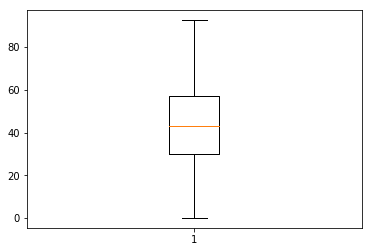

In [27]:
plt.boxplot(Country_dt.imports)

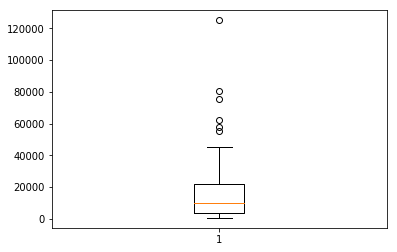

In [28]:
#imports	income	inflation	life_expec	total_fer	gdpp
# outlier treatment for Amount
plt.boxplot(Country_dt.income)
Q1 = Country_dt.income.quantile(0.25)
Q3 = Country_dt.income.quantile(0.75)
IQR = Q3 - Q1
Country_dt = Country_dt[(Country_dt.income >= Q1 - 1.5*IQR) & (Country_dt.income <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x1a1bd4d278>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1bd4dda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bd53b00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1bd536a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1bd4d400>,
  <matplotlib.lines.Line2D at 0x1a1bd4d940>]}

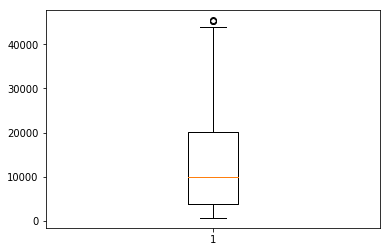

In [29]:
plt.boxplot(Country_dt.income)

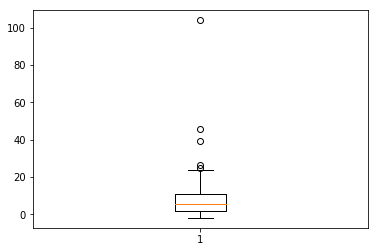

In [30]:
#imports	income	inflation	life_expec	total_fer	gdpp
# outlier treatment for Amount
plt.boxplot(Country_dt.inflation)
Q1 = Country_dt.inflation.quantile(0.25)
Q3 = Country_dt.inflation.quantile(0.75)
IQR = Q3 - Q1
Country_dt = Country_dt[(Country_dt.inflation >= Q1 - 1.5*IQR) & (Country_dt.inflation <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x1a1b1d5cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1b1dd198>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b034a20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b0347b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1b1d5dd8>,
  <matplotlib.lines.Line2D at 0x1a1b1dd0f0>]}

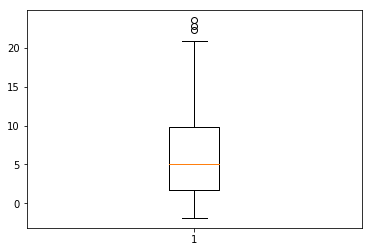

In [31]:
plt.boxplot(Country_dt.inflation)

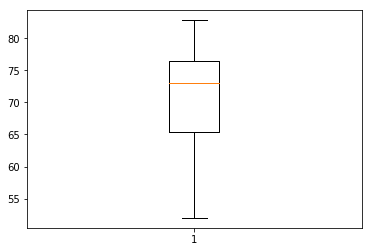

In [32]:
#imports	income	inflation	life_expec	total_fer	gdpp
# outlier treatment for Amount
plt.boxplot(Country_dt.life_expec)
Q1 = Country_dt.life_expec.quantile(0.25)
Q3 = Country_dt.life_expec.quantile(0.75)
IQR = Q3 - Q1
Country_dt = Country_dt[(Country_dt.life_expec >= Q1 - 1.5*IQR) & (Country_dt.life_expec <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x1a1ab37f60>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1aaccba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1aaccef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1aacc438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1ab37fd0>,
  <matplotlib.lines.Line2D at 0x10b2fea90>]}

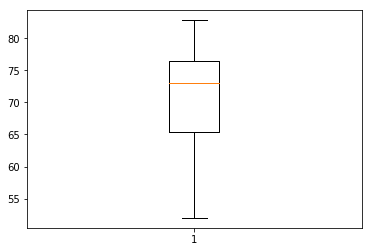

In [33]:
plt.boxplot(Country_dt.life_expec)

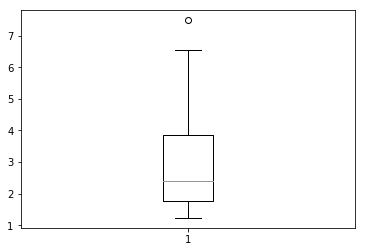

In [34]:
#imports	income	inflation	life_expec	total_fer	gdpp
# outlier treatment for Amount
plt.boxplot(Country_dt.total_fer)
Q1 = Country_dt.total_fer.quantile(0.25)
Q3 = Country_dt.total_fer.quantile(0.75)
IQR = Q3 - Q1
Country_dt = Country_dt[(Country_dt.total_fer >= Q1 - 1.5*IQR) & (Country_dt.total_fer <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x1a1acbb550>],
 'caps': [<matplotlib.lines.Line2D at 0x1a176fa668>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a17733240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a176fac50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1acbb438>,
  <matplotlib.lines.Line2D at 0x1a1adaed30>]}

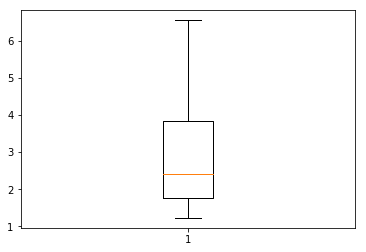

In [35]:
plt.boxplot(Country_dt.total_fer)

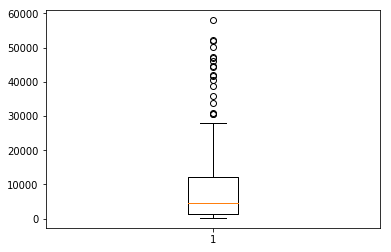

In [36]:
#imports	income	inflation	life_expec	total_fer	gdpp
# outlier treatment for Amount
plt.boxplot(Country_dt.gdpp)
Q1 = Country_dt.gdpp.quantile(0.25)
Q3 = Country_dt.gdpp.quantile(0.75)
IQR = Q3 - Q1
Country_dt = Country_dt[(Country_dt.gdpp >= Q1 - 1.5*IQR) & (Country_dt.gdpp <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x1a127392e8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a127394a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ae33a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1af3a358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a12739630>,
  <matplotlib.lines.Line2D at 0x1a12739860>]}

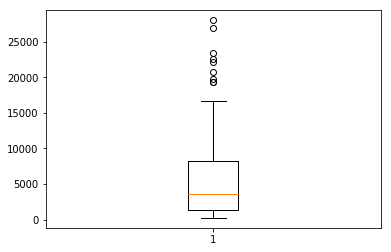

In [37]:
plt.boxplot(Country_dt.gdpp)

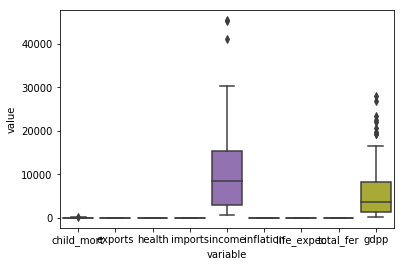

In [38]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(x="variable", y="value", data=pd.melt(Country_dt[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]))

plt.show()

In [49]:
# standardise all parameters
Country_dt_norm = Country_dt.drop("country", axis=1)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Country_dt_norm = standard_scaler.fit_transform(Country_dt_norm)

In [50]:
Country_dt_norm = pd.DataFrame(Country_dt_norm)
Country_dt_norm.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
Country_dt_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.496140,-1.453476,0.573983,-0.020965,-0.972968,0.319527,-1.823541,1.895626,-0.865741
1,-0.681544,-0.500029,0.107676,0.187261,-0.077438,-0.489241,0.948678,-0.954703,-0.286957
2,-0.364952,0.050851,-0.969809,-0.780709,0.242240,1.407687,0.976263,-0.107123,-0.226411
3,2.348278,1.316816,-1.567406,-0.133519,-0.511211,2.437028,-1.285648,2.128027,-0.378593
4,-0.867949,0.426933,-0.127741,0.766918,0.909582,-0.987572,1.017639,-0.626608,1.040140


In [45]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [51]:
hopkins(Country_dt_norm)

0.71627935688847388

In [48]:
Country_dt_norm

array([[ 1.49614048, -1.45347596,  0.57398277, ..., -1.82354141,
         1.89562582, -0.86574074],
       [-0.68154434, -0.50002935,  0.1076761 , ...,  0.94867847,
        -0.95470291, -0.28695653],
       [-0.36495157,  0.05085091, -0.96980923, ...,  0.97626275,
        -0.10712315, -0.22641083],
       ..., 
       [-0.48330401,  1.83061791,  0.23896633, ...,  0.50733003,
        -0.74964329, -0.7418675 ],
       [ 0.49310359, -0.39409084, -0.51255705, ..., -0.26502974,
         1.10956394, -0.7418675 ],
       [ 1.28606491, -0.02330605, -0.19112235, ..., -2.40281124,
         1.60854235, -0.71732194]])

In [52]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(Country_dt_norm)
    sse_.append([k, silhouette_score(Country_dt_norm, kmeans.labels_)])

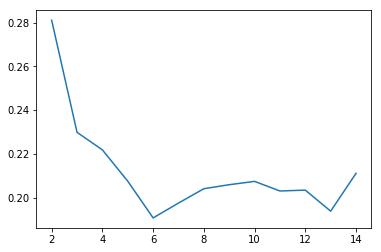

In [53]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [54]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 5, max_iter=50)
model_clus3.fit(Country_dt_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

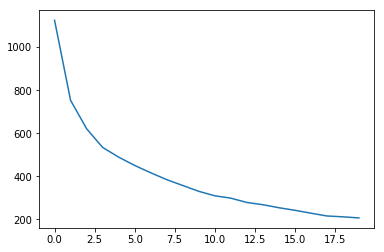

In [55]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(Country_dt_norm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [57]:
# analysis of clusters formed
Country_dt.index = pd.RangeIndex(len(Country_dt.index))
Country_dt_km = pd.concat([Country_dt, pd.Series(model_clus3.labels_)], axis=1)
Country_dt_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']


In [58]:
Country_dt_km

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,3
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,0
8,Bahamas,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,3
9,Bahrain,8.6,69.50,4.97,50.9,41100,7.440,76.0,2.16,20700,3


In [63]:

Country_dt_child_mort = 	pd.DataFrame(Country_dt_km.groupby(["ClusterID"]).child_mort.mean())
Country_dt_exports = 	pd.DataFrame(Country_dt_km.groupby(["ClusterID"]).exports.mean())
Country_dt_health = 	pd.DataFrame(Country_dt_km.groupby(["ClusterID"]).health.mean())
Country_dt_imports = 	pd.DataFrame(Country_dt_km.groupby(["ClusterID"]).imports.mean())
Country_dt_income = 	pd.DataFrame(Country_dt_km.groupby(["ClusterID"]).income.mean())
Country_dt_inflation = 	pd.DataFrame(Country_dt_km.groupby(["ClusterID"]).inflation.mean())
Country_dt_life_expec = 	pd.DataFrame(Country_dt_km.groupby(["ClusterID"]).life_expec.mean())
Country_dt_total_fer = 	pd.DataFrame(Country_dt_km.groupby(["ClusterID"]).total_fer.mean())
Country_dt_gdpp = 	pd.DataFrame(Country_dt_km.groupby(["ClusterID"]).gdpp.mean())



In [81]:
df = pd.concat([pd.Series([0,1,2]), Country_dt_child_mort, Country_dt_exports, Country_dt_health,Country_dt_imports,Country_dt_income,Country_dt_inflation,Country_dt_life_expec,Country_dt_total_fer,Country_dt_gdpp], axis=1)
df.columns = ["ClusterID",'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df.head()

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,,
0,0.0,29.803448,25.544448,5.481034,28.122962,10328.275862,10.963103,72.224138,2.495517,4838.137931
1,1.0,22.265000,44.972500,6.749750,58.435000,9406.500000,4.805475,71.670000,2.372500,4620.400000
2,2.0,86.828000,21.612400,6.586000,40.832000,2224.080000,6.135800,59.796000,4.986800,983.920000
3,NaN,8.042857,55.076190,6.988571,51.733333,26380.952381,3.938143,76.495238,1.791905,17046.190476
4,NaN,85.980000,44.340000,4.867000,39.890000,4579.900000,18.930000,61.510000,5.127000,2276.200000


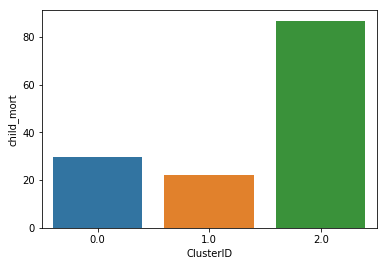

In [82]:
sns.barplot(x=df.ClusterID, y=df.child_mort)

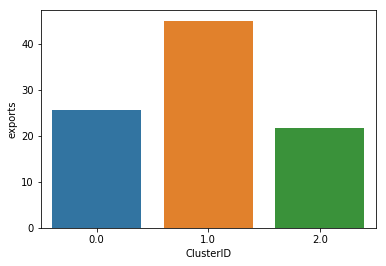

In [83]:
sns.barplot(x=df.ClusterID, y=df.exports)

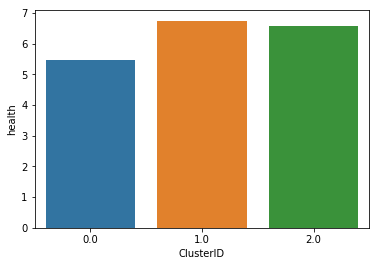

In [84]:
sns.barplot(x=df.ClusterID, y=df.health)

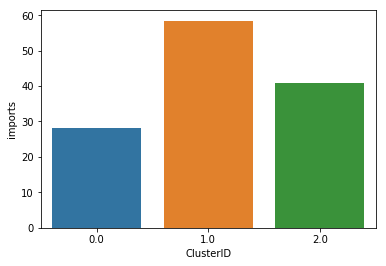

In [85]:
sns.barplot(x=df.ClusterID, y=df.imports)

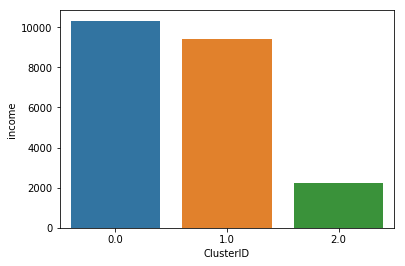

In [86]:
#'income','inflation','life_expec','total_fer','gdpp'
sns.barplot(x=df.ClusterID, y=df.income)

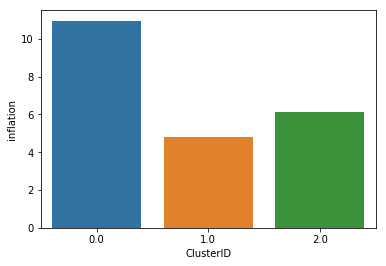

In [87]:
#'income','inflation','life_expec','total_fer','gdpp'
sns.barplot(x=df.ClusterID, y=df.inflation)

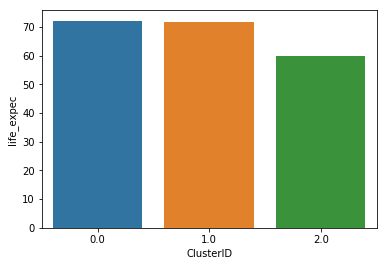

In [88]:
#'income','inflation','life_expec','total_fer','gdpp'
sns.barplot(x=df.ClusterID, y=df.life_expec)

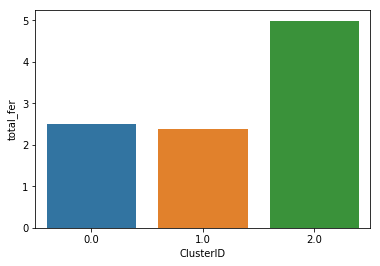

In [89]:
#'income','inflation','life_expec','total_fer','gdpp'
sns.barplot(x=df.ClusterID, y=df.total_fer)

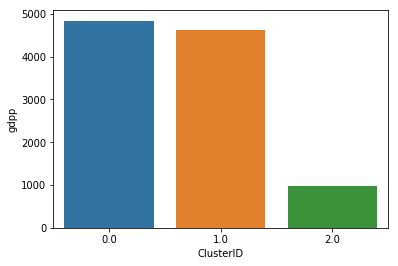

In [90]:
#'income','inflation','life_expec','total_fer','gdpp'
sns.barplot(x=df.ClusterID, y=df.gdpp)

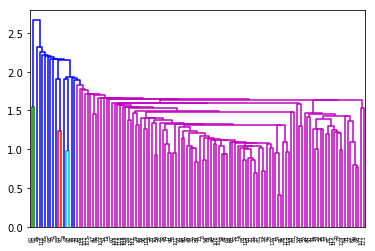

In [77]:
# heirarchical clustering
mergings = linkage(Country_dt_norm, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

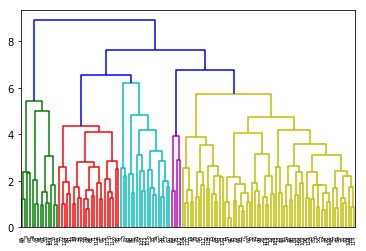

In [78]:
mergings = linkage(Country_dt_norm, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [79]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
RFM_hc = pd.concat([Country_dt, clusterCut], axis=1)
RFM_hc.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

In [80]:
#summarise
Country_dt1_child_mort = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).child_mort.mean())
Country_dt1_exports = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).exports.mean())
Country_dt1_health = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).health.mean())
Country_dt1_imports = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).imports.mean())
Country_dt1_income = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).income.mean())
Country_dt1_inflation = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).inflation.mean())
Country_dt1_life_expec = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).life_expec.mean())
Country_dt1_total_fer = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).total_fer.mean())
Country_dt1_gdpp = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).gdpp.mean())



In [91]:
df = pd.concat([pd.Series([0,1,2]), Country_dt1_child_mort, Country_dt1_exports, Country_dt1_health,Country_dt1_imports,Country_dt1_income,Country_dt1_inflation,Country_dt1_life_expec,Country_dt1_total_fer,Country_dt1_gdpp], axis=1)
df.columns = ["ClusterID",'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df.head()

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,72.680952,28.605214,5.488571,33.784902,5582.404762,11.723690,63.159524,4.506905,2334.071429
1,1,25.988406,38.593913,6.666522,50.708696,9823.478261,5.508826,71.759420,2.408406,5246.681159
2,2,7.750000,58.257143,7.036429,52.942857,29921.428571,4.502929,76.685714,1.812143,19314.285714


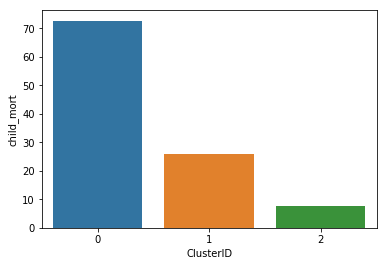

In [92]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.child_mort)

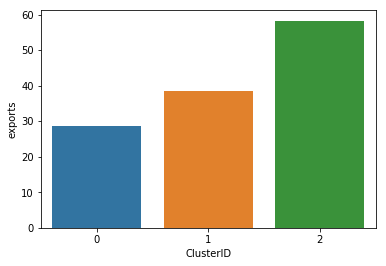

In [93]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.exports)